iris кластерезация 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


наше основные даные с которыми мы работате заключается в 

sepal lenght - длина чашелистика

sepal width - ширина чашелистика

petal lenght - длина лепестков

petal with - ширина лепестков

target - цель

name - имя 

In [4]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

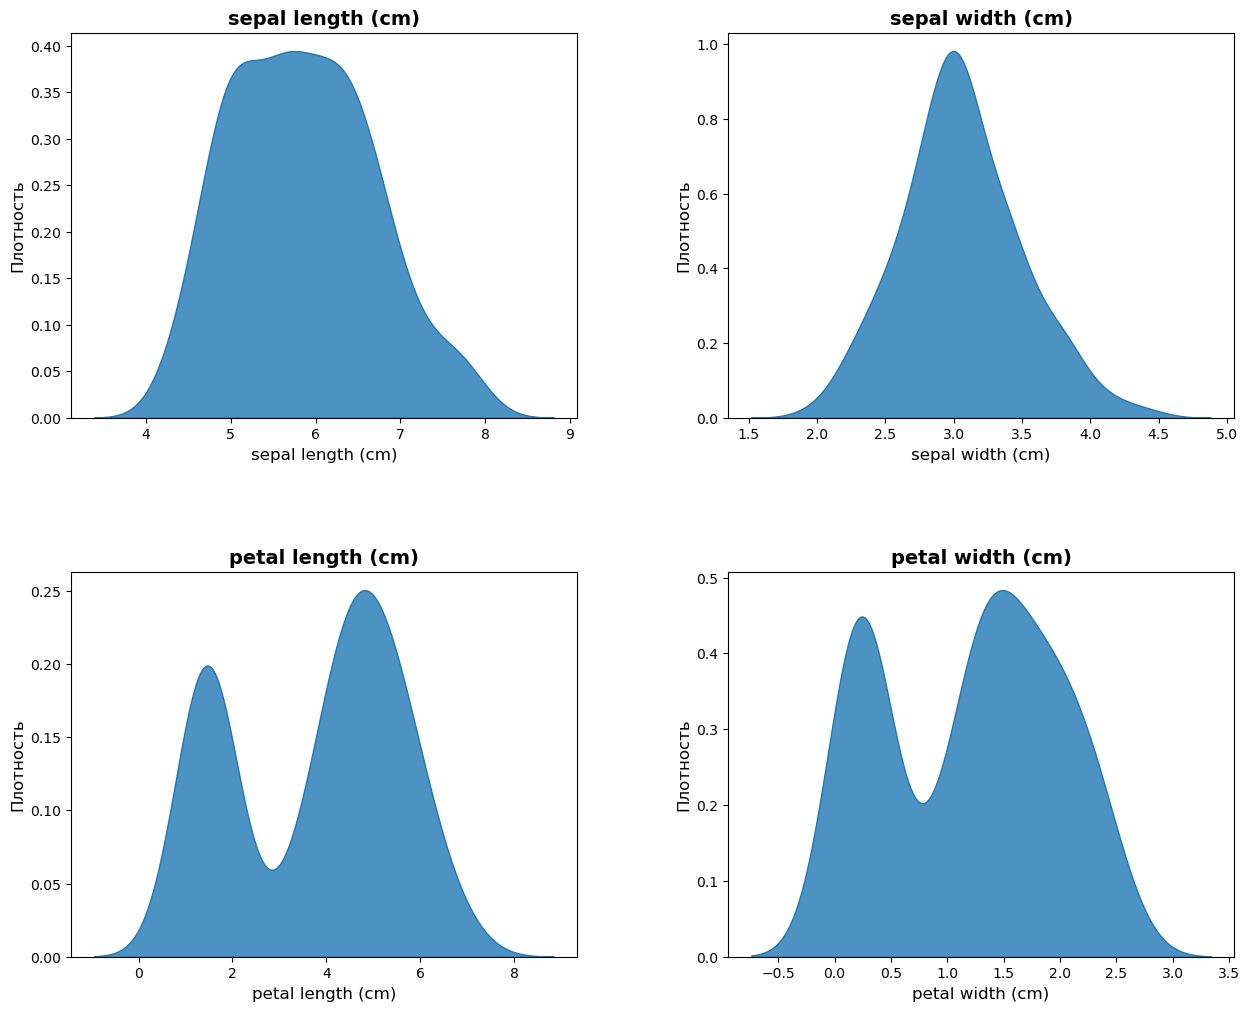

In [6]:
fig, axes = plt.subplots(2,2, figsize = (15,12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
columns = iris.feature_names 
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = iris_df,
                x = column,
                fill = True,
                alpha = 0.8,
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 14)
    ax.set_xlabel(column, fontsize = 12)
    ax.set_ylabel('Плотность', fontsize = 12)

plt.show()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

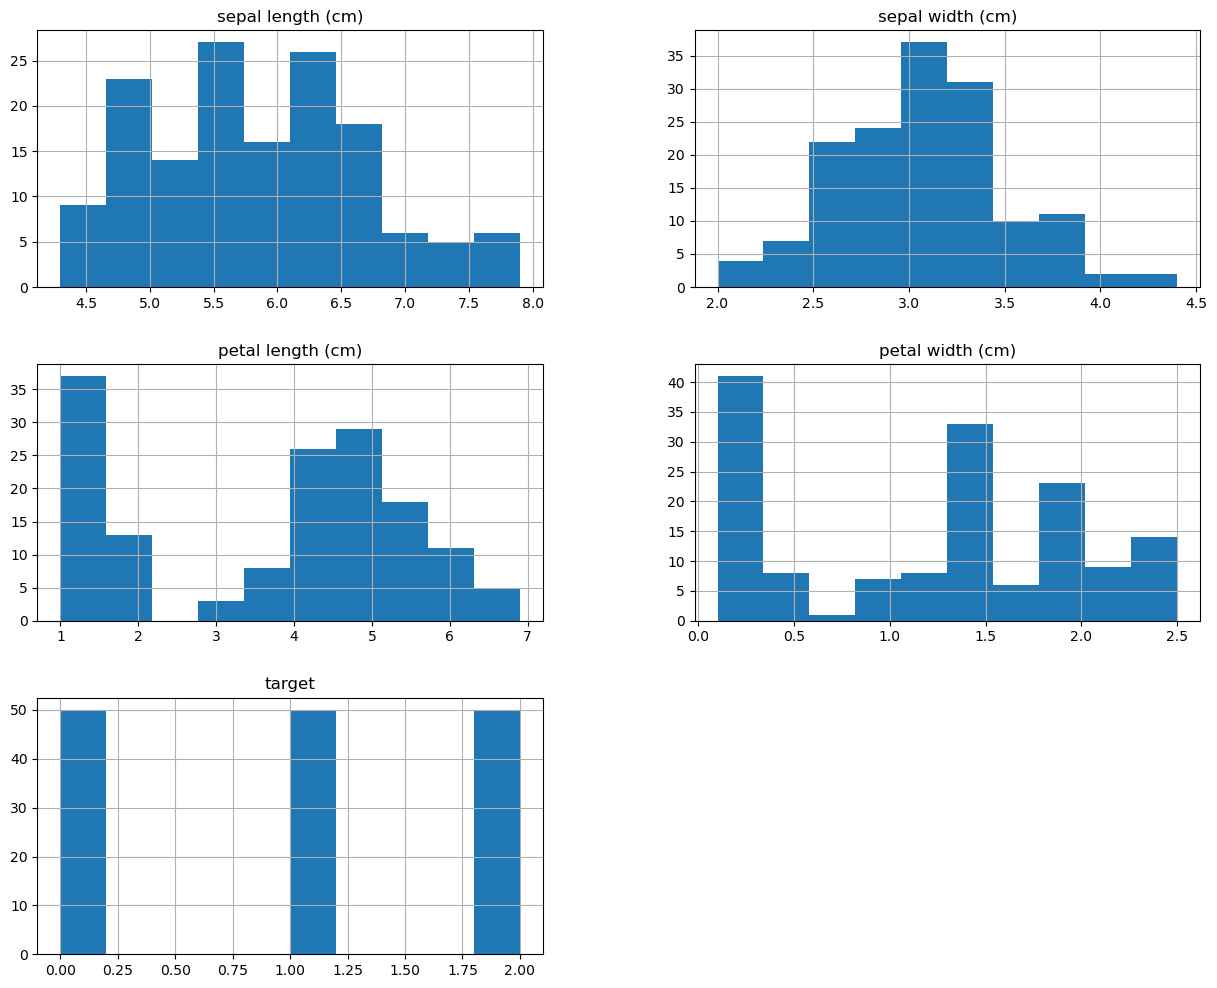

In [7]:
iris_df.hist( figsize = (15,12))

по этим диаграммам можем увидеть что чашелистики имееют естественнон распределение в то время как листочки наоборот в среднем распределяются по краям диаграм , мы сразу видем что основное разделение меж ирисов будет в листочках

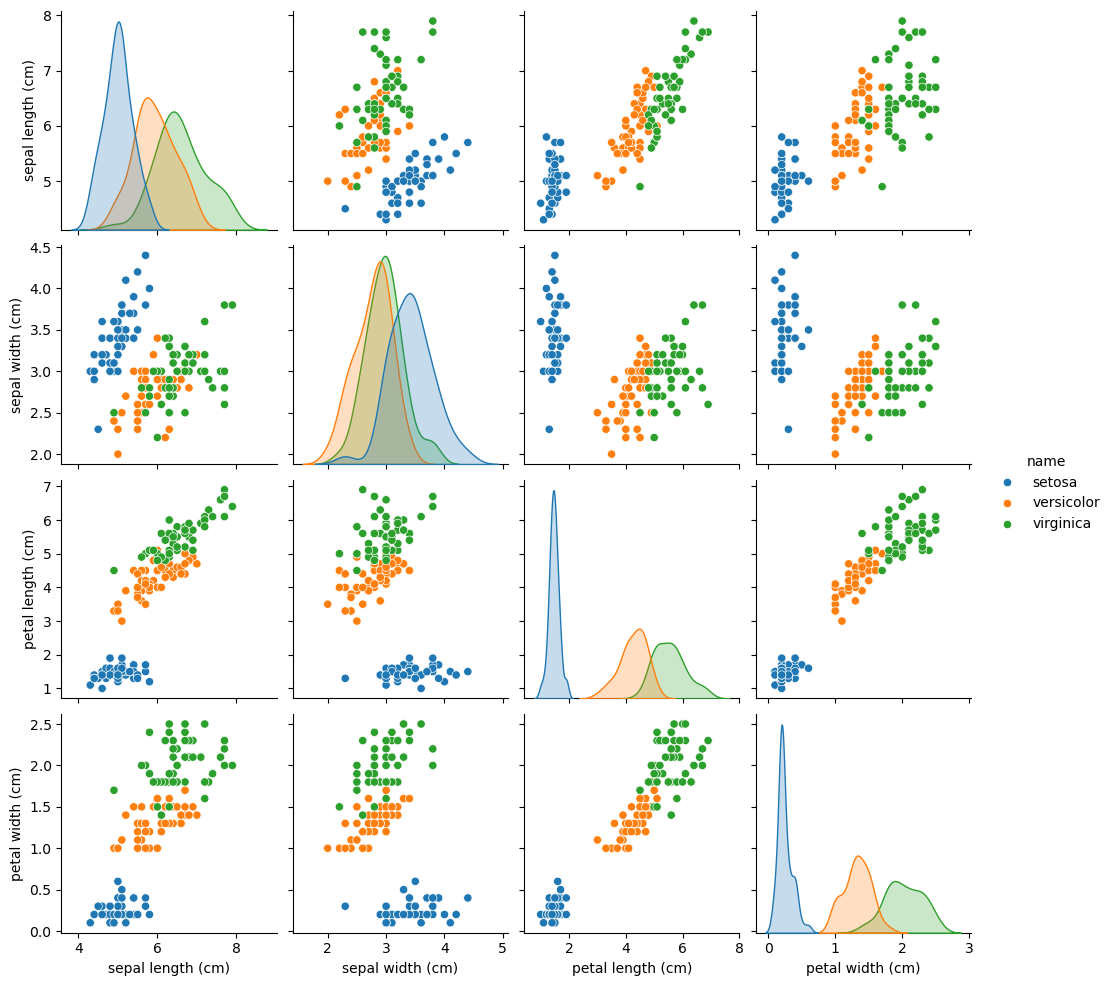

In [8]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

а по этой диаграмме видим что setosa самая выделяемая вид ириса и группировать с ним будет не трудно, а вот versicolor и verginica имеют очень сного схожостей и с ними будет больше всего трудностей для моделей 

<Axes: >

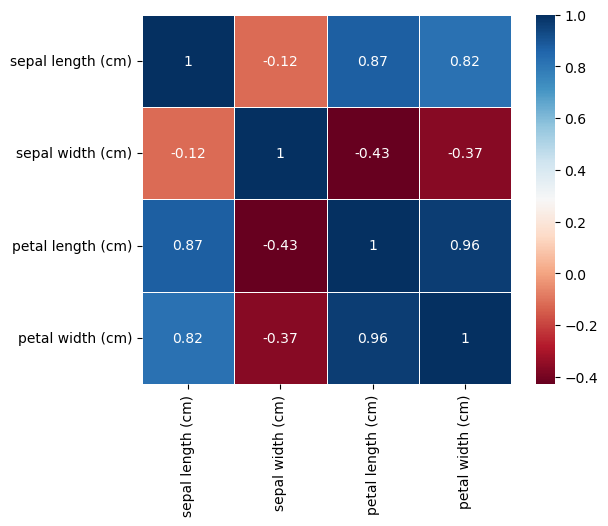

In [9]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
sns.heatmap(corr, square=True, annot=True, linewidths=.5 , cmap="RdBu")

тут видим корреляцую меж длиной и шириной листочков , а также обратная коррелация меж шириной чашелистиков и длиной\шириной листочков

## нормализация

In [10]:
iris_df['name'] = iris_df['name'].map({
    'setosa': 0,
    'versicolor': 1, 
    'virginica': 2
})

In [11]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(iris_df), 
                        columns=iris_df.columns)

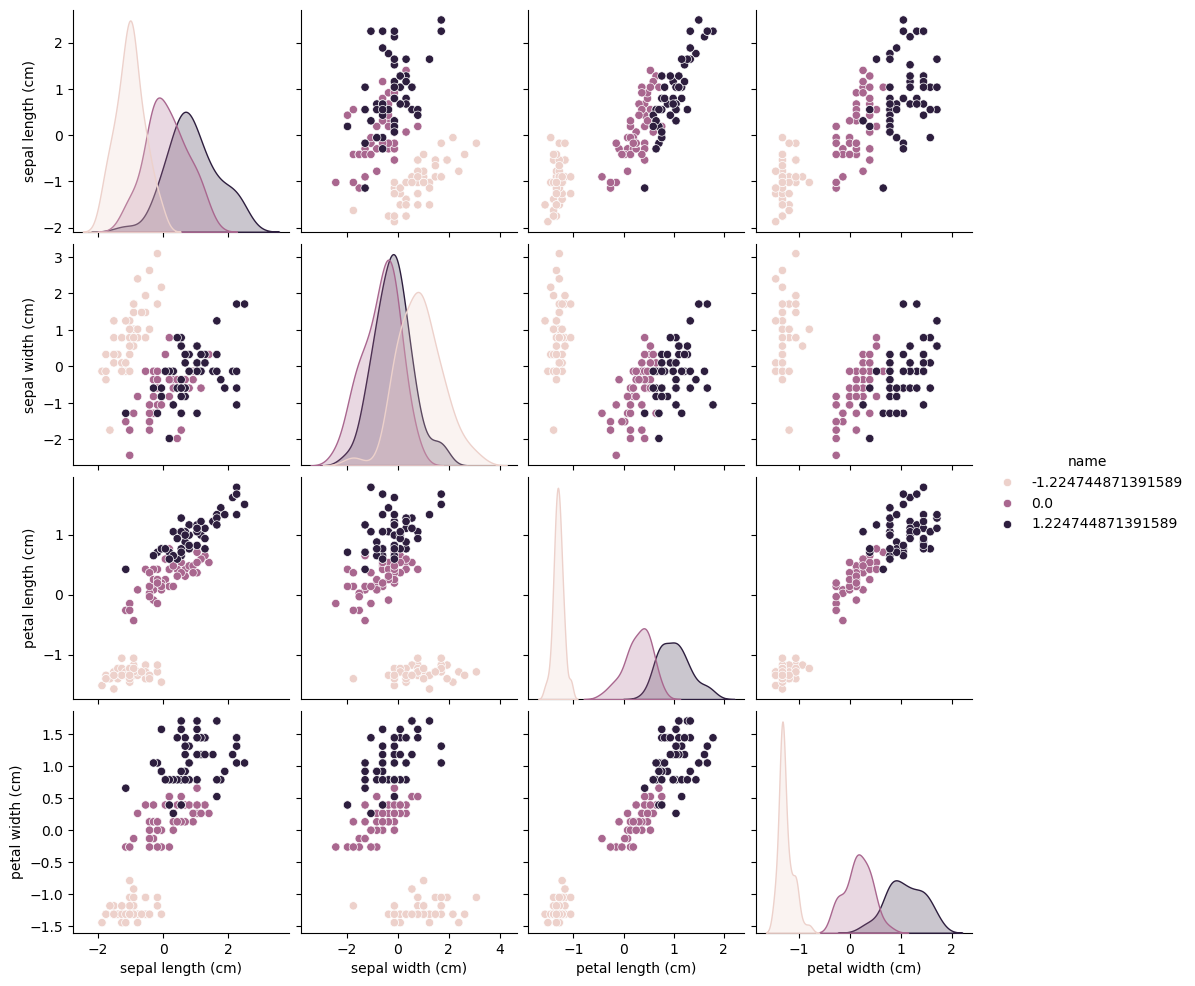

In [52]:
sns.pairplot(df_scaled[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

## кластерезация
после того как мы стандартизировали данные давайте теперь их кластаризировать , я решил использовать для этого k-means , spectral clustering и DBSCAN

In [14]:
from sklearn.cluster import DBSCAN, SpectralClustering, KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

spectral = SpectralClustering(n_clusters=3, random_state=42, affinity='rbf')
spectral_labels = spectral.fit_predict(df_scaled)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [20]:
clustering_results = {
    'DBSCAN': dbscan_labels,
    'Spectral': spectral_labels, 
    'KMeans': kmeans_labels
}

после создания моделей давайте посмотрим как они справились

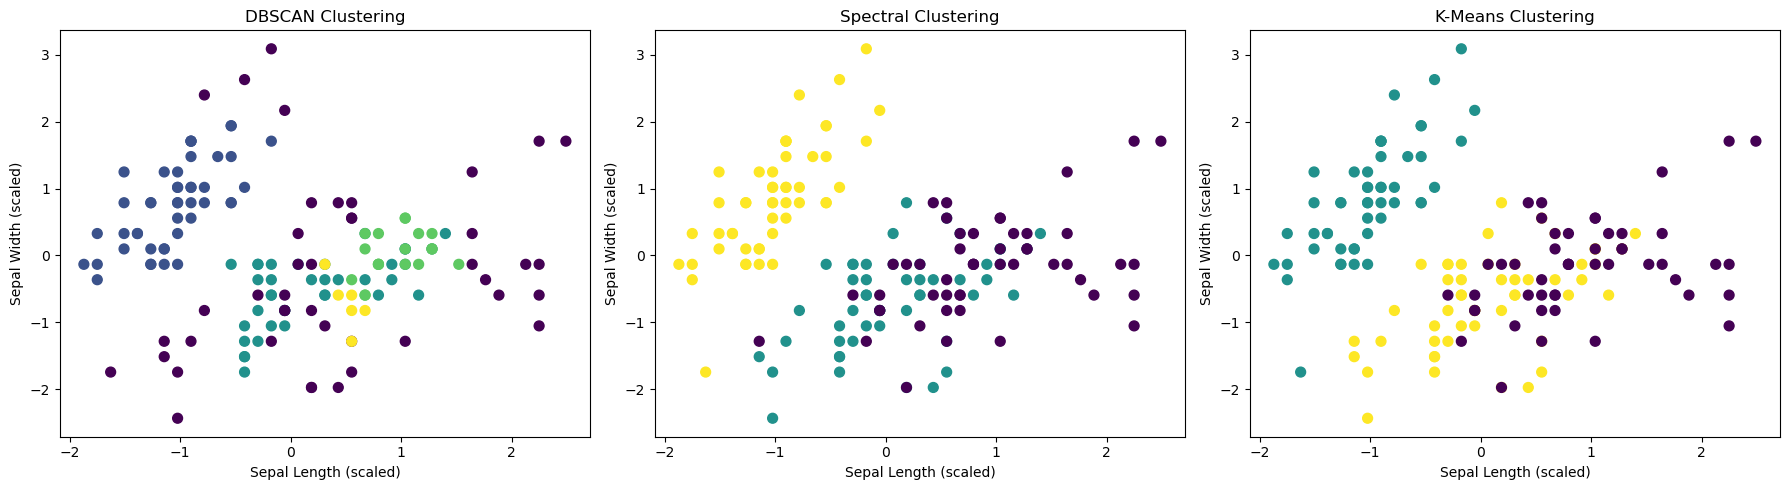

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=dbscan.labels_, cmap='viridis', s=50)
axes[0].set_title('DBSCAN Clustering')
axes[0].set_xlabel('Sepal Length (scaled)')
axes[0].set_ylabel('Sepal Width (scaled)')

axes[1].scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=spectral.labels_, cmap='viridis', s=50)
axes[1].set_title('Spectral Clustering')
axes[1].set_xlabel('Sepal Length (scaled)')
axes[1].set_ylabel('Sepal Width (scaled)')

axes[2].scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
axes[2].set_title('K-Means Clustering')
axes[2].set_xlabel('Sepal Length (scaled)')
axes[2].set_ylabel('Sepal Width (scaled)')

plt.tight_layout()
plt.show()

можем видеть что как и предпологалось основные трудности появились в куче данным virginica и virsicolor

а dbscan разделил его на 4 отдельные группы 

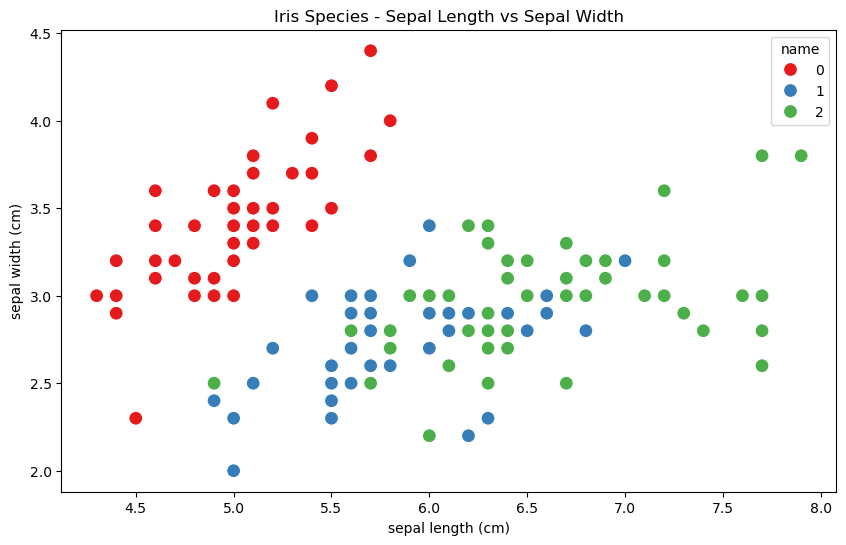

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', 
                hue='name', s=100, palette='Set1')
plt.title('Iris Species - Sepal Length vs Sepal Width')
plt.show()

сравнивая с нашими моделями вилим что spectral clustering и k-means справились хорошо с разделением в группы в то сремя как dbscan запутался между пересекающемсями данными

### итог

мы видим что две из трёх наших моделей смогли успешно группировать наши данные к их видам 
